In [1]:
import pandas  as pd
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt

import numpy as np

In [15]:
#Input the file name."JoeDupes3_forearth"
fname = 'hotspot_2015'

data = pd.read_csv(fname+".csv", parse_dates=['datetime'], usecols=['latitude','longitude','datetime', 'power'])
#Skip the 1st header row.
#data.next()
data.head()

,latitude,longitude,datetime,power
0,-15.0460,144.3795,2015-01-01 01:04:50,14.2
1,-15.8927,136.6096,2015-01-01 01:00:50,11.9
2,-17.1466,145.8501,2015-01-01 01:00:50,10.0
3,-18.0796,122.6971,2015-01-01 02:41:30,11.1
4,-18.0764,122.6902,2015-01-01 02:45:40,11.0


In [3]:
max(data.power)

1810.5999999999999

(array([   189.,  31077.,  47088.,  33699.,  22275.,  15110.,  10847.,
          7921.,   6193.,   4849.,   3956.,   3268.,   2780.,   2257.,
          1889.,   1640.,   1526.,   1353.,   1158.,   1042.,    903.,
           795.,    710.,    645.,    611.,    492.,    494.,    445.,
           389.,    367.,    280.,    350.,    299.,    280.,    263.,
           240.,    222.,    216.,    197.,    178.,    167.,    159.,
           139.,    143.,    139.,    138.,    119.,    110.,     98.,
            92.,     77.,     90.,    115.,     87.,     90.,     79.,
            58.,     72.,     76.]),
 array([   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,
          45.,   50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,
          90.,   95.,  100.,  105.,  110.,  115.,  120.,  125.,  130.,
         135.,  140.,  145.,  150.,  155.,  160.,  165.,  170.,  175.,
         180.,  185.,  190.,  195.,  200.,  205.,  210.,  215.,  220.,
         225.,  230.,  235.,  240.,  245

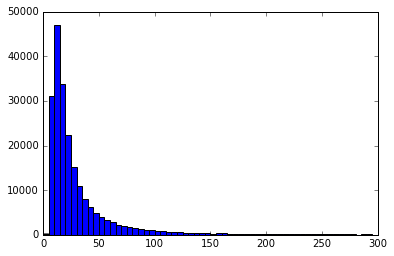

In [4]:
binwidth = 5
plt.hist(data.power, bins=np.arange(min(data.power), 300, binwidth))

(array([  2.85300000e+03,   9.18400000e+03,   1.63450000e+04,
          1.76640000e+04,   1.93230000e+04,   2.32530000e+04,
          2.84350000e+04,   3.19250000e+04,   2.77030000e+04,
          2.42970000e+04,   1.97850000e+04,   1.21530000e+04,
          8.39700000e+03,   6.03500000e+03,   4.46700000e+03,
          3.42600000e+03,   2.60400000e+03,   1.89800000e+03,
          1.52900000e+03,   1.22500000e+03,   9.71000000e+02,
          7.72000000e+02,   6.16000000e+02,   5.05000000e+02,
          4.03000000e+02,   2.97000000e+02,   2.77000000e+02,
          2.16000000e+02,   1.66000000e+02,   1.01000000e+02,
          1.16000000e+02,   9.70000000e+01,   6.40000000e+01,
          5.20000000e+01,   4.20000000e+01,   3.80000000e+01,
          3.00000000e+01,   2.40000000e+01,   1.90000000e+01,
          8.00000000e+00,   9.00000000e+00,   6.00000000e+00,
          7.00000000e+01]),
 array([ 288.,  293.,  298.,  303.,  308.,  313.,  318.,  323.,  328.,
         333.,  338.,  343.,  348

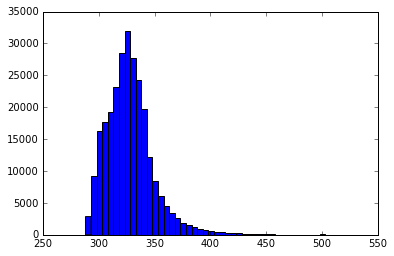

In [5]:
binwidth = 5
plt.hist(data.temp_kelvin, bins=np.arange(min(data.temp_kelvin), max(data.temp_kelvin), binwidth))

In [6]:
data.shape

(444900, 23)

In [7]:
f = open(fname + '.kml', 'w')

#Writing the kml file.
f.write("<?xml version='1.0' encoding='UTF-8'?>\n")
f.write("<kml xmlns='http://earth.google.com/kml/2.1'>\n")
f.write("<Document>\n")
f.write("   <name>" + fname + '.kml' +"</name>\n")
for i, fid in enumerate(data.FID[:1000]):
    if data.power[i] < 50:
        continue
    f.write("   <Placemark>\n")
    f.write("       <name>" + str(data.temp_kelvin[i]  -273.15) + "C</name>\n")
    f.write("       <description>" +  str(data.datetime[i]) +"</description>\n")
    f.write("       <Point>\n")
    f.write("           <coordinates>" + str(data.longitude[i]) + "," + str(data.latitude[i]) +"</coordinates>\n")
    f.write("       </Point>\n")
    f.write("   </Placemark>\n")
f.write("</Document>\n")
f.write("</kml>\n")
f.close()

In [16]:
json = data[df.line_race != 0].to_json(orient="records")


In [19]:
f = open('data.js', 'w')
f.write('var data = ' + json + ";")
f.close()